## Machine Learning with PySpark

**Course Structure:**
* Chapter 1. Introduction
* Chapter 2. Classification
* Chapter 3. Regression
* Chapter 4. Ensembles and Pipelines

### CHAPTER 1. Introduction

#### Part 1.1 Machine learning & Spark

* We will learn how to build **Machine Learning models** on *large data sets* using **distributed computing techniques**
* Performance of models depend on data, in general, more data is better
* If the data is too big, it cannot fit into RAM, it has to page between RAM and disk, which is slow
* We can distribute the data across multiple computers in a cluster   

**Spark:**
* Spark is a general purpose framework for cluster computing
* Popular for two reasons:
    1. Faster than other Big Data technologies because it does processing in memory
    2. Developer-friendly interface with well-documented high-level API
* It consists of one or more **nodes** and a cluster manager
* The manager allocates resource and coordinates activities across the cluster
* The driver program communicates with the manager

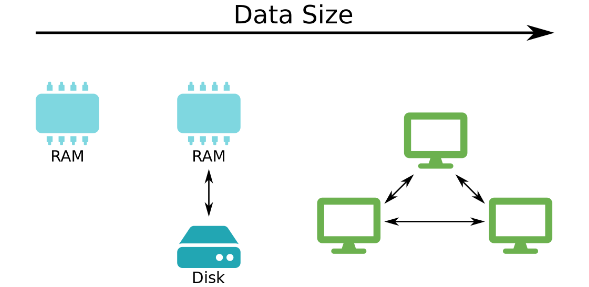

In [1]:
# display Spark approach for big data set
from IPython import display

display.Image("Images/22_spark.png")

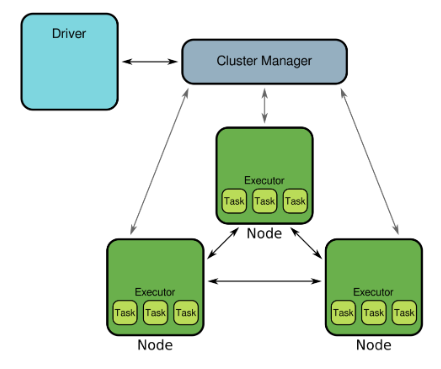

In [2]:
from IPython import display

display.Image("Images/22_spark_components.png")

#### Part 1.2 Connecting to Spark

* The connection with Spark is established by the **driver**, which can be written in Java, Scala, Python or R
* In Python, we use *'pyspark'* module
* Check version: *'pyspark.__version__'*
* *'pyspark'* has a few submodules to implement different aspects of Spark interface:
    * Structured Data: *'pyspark.sql'*
    * Streaming Data: *'pyspark.streaming'*
    * Machine Learning: *'pyspark.ml'*
* Tell the Spark where the cluster is located by providing a **Spark URL**, which can be remote or local
    * Remote Example: *'spark://<IP address | DNS name>:<port>'*
    * Local Example: *'local'* or *'local[4]'*
* Start by creating a SparkSession
    * Example: *'spark = SparkSession.builder.master('locao[*]').appName('first_spark_application).getOrCreate()'*
* Close connection to Spark after the work
    * Example: *'spark.stop()'*    

In [4]:
# Code for part 1.2

# creating a SparkSession
from pyspark.sql import SparkSession

# create SparkSession object
spark = SparkSession.builder.master('local[*]').appName('test').getOrCreate()

# version of Spark
print(spark.version)

# terminate the cluster
spark.stop()

3.5.0


#### Part 1.3 Loading data

* Spark represents tabular data using *'DataFrame'* class
* Its selected methods and attributes:
    * *'.count()'* gives the number of rows
    * *'.show()'* displays a subset of rows
    * *'.printSchema()'* gives views on column types
    * *'dtypes'* gives views on column types
* *'csv'* is a common format to store tabular data
* Use *'spark.read.csv()'* to read data from CSV file and returns a DataFrame
    * *'header'*: is the first row a header?
    * *'sep'*: field separator
    * *'schema'*: explicit column data types
    * *'inferSchema'*: deduce column data types from data?
    * *'nullValue'*: placeholder for missing data, it is case-sensitive
* You can specify the column types manually to avoid wrong column types

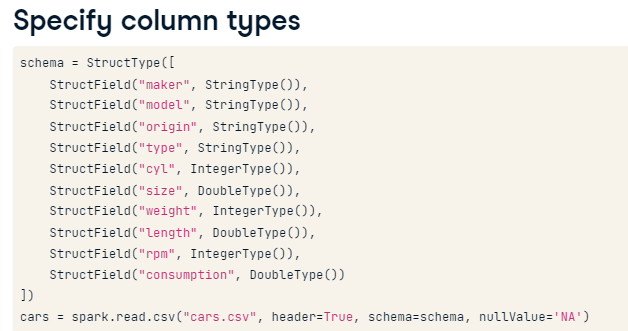

In [5]:
# display specify column types

from IPython import display
display.Image("Images/22_specify_column_type.png")

In [6]:
# Code for part 1.3

# loading flights data
from pyspark.sql import SparkSession

# create spark session: spark
spark = SparkSession.builder.master('local[*]').appName('test').getOrCreate()

# read data from CSV file
flights = spark.read.csv('22_datasets/flights.csv',
                         sep=',',
                         header=True,
                         inferSchema=True,
                         nullValue='NA')

# get number of records
print("The data contain %d records." % flights.count())

# view the first five records
flights.show(5)

# check column data types
print(flights.dtypes)

The data contain 50000 records.
+---+---+---+-------+------+---+----+------+--------+-----+
|mon|dom|dow|carrier|flight|org|mile|depart|duration|delay|
+---+---+---+-------+------+---+----+------+--------+-----+
| 11| 20|  6|     US|    19|JFK|2153|  9.48|     351| NULL|
|  0| 22|  2|     UA|  1107|ORD| 316| 16.33|      82|   30|
|  2| 20|  4|     UA|   226|SFO| 337|  6.17|      82|   -8|
|  9| 13|  1|     AA|   419|ORD|1236| 10.33|     195|   -5|
|  4|  2|  5|     AA|   325|ORD| 258|  8.92|      65| NULL|
+---+---+---+-------+------+---+----+------+--------+-----+
only showing top 5 rows

[('mon', 'int'), ('dom', 'int'), ('dow', 'int'), ('carrier', 'string'), ('flight', 'int'), ('org', 'string'), ('mile', 'int'), ('depart', 'double'), ('duration', 'int'), ('delay', 'int')]


In [7]:
# Code for part 1.3 (continue)

# loading SMS spam data
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

# specify column names and types
schema = StructType([
    StructField("id", IntegerType()),
    StructField("text", StringType()),
    StructField("label", IntegerType())
])

# load data from a delimited file
sms = spark.read.csv('22_datasets/sms.csv', sep=';', header=False, schema=schema)
sms.printSchema()

root
 |-- id: integer (nullable = true)
 |-- text: string (nullable = true)
 |-- label: integer (nullable = true)


### CHAPTER 2. Classification

#### Part 2.1 Data Preparation

*